 ## EDA Titanic Data Set

In [15]:
# Importing necessary libraries and loading data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
sns.set(color_codes=True)

df = pd.read_csv("train.csv")
df_org = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking and modifying the dataframe

In [2]:
# Checking the data types.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
# Checking the shape (dimensions).
print(df.shape)
# Checking for duplicate entries (there are none).
duplicates = df[df.duplicated()]
print(duplicates.shape)

(891, 12)
(0, 12)


In [16]:
# Checking for null (NaN) values.
print(df.isnull().sum())  #isnull() returns dataframe with True if null else False
# Replace NaN in the age column with the mean (or median).
df["Age"] = df["Age"].fillna(df["Age"].mean())
# Validation.
print("Validation:")
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Validation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Replacing sex with numerical values (0 if female else 1).
df["Sex"] = df["Sex"].replace({"female" : 0, "male" : 1})

In [ ]:
# Dropping cabin


In [ ]:
# Embarked number

In [6]:
# Checking dataframe before EDA
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### Exploring distributions of the variables

0    0.616162
1    0.383838
Name: Survived, dtype: float64

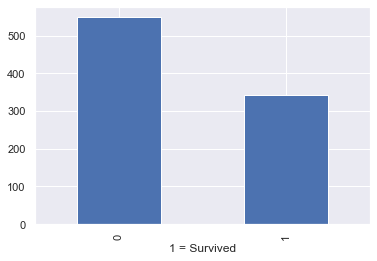

In [19]:
# Histogram of survival.
df["Survived"].value_counts().plot(kind="bar")
plt.xlabel("1 = Survived")
df["Survived"].value_counts(normalize="True")

male      0.647587
female    0.352413
Name: Sex, dtype: float64

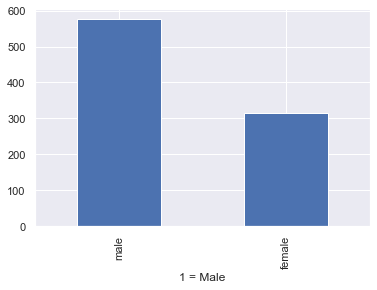

In [20]:
# Barplot of sex.
df["Sex"].value_counts().plot(kind="bar")
plt.xlabel("1 = Male")
df["Sex"].value_counts(normalize="True")

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

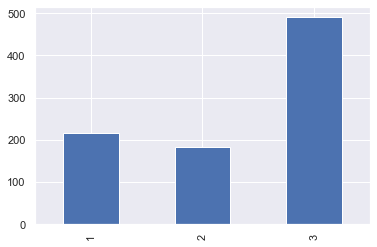

In [21]:
# Barplot of Pclasses.
df["Pclass"].value_counts().plot(kind="bar")
df["Pclass"].value_counts(normalize="True")

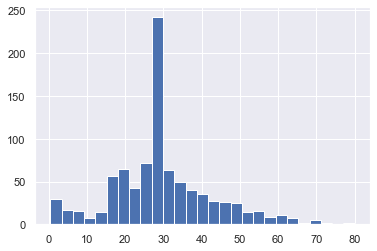

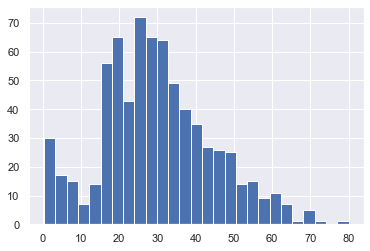

Mean: 29.7
Median: 28.0


In [40]:
# Histogram of the age distribution
ages = df["Age"].values.tolist()
n = math.ceil((max(ages) - min(ages))/3)
ax = plt.hist(ages, bins = n)
plt.show()
ages = df_org["Age"].values.tolist()
n = math.ceil((max(ages) - min(ages))/3)
ax = plt.hist(ages, bins = n)
plt.show()
ages_na = df_org["Age"].dropna().tolist()
print(f"Mean: {round(np.mean(ages_na),2)}")
print(f"Median: {np.median(ages_na)}")

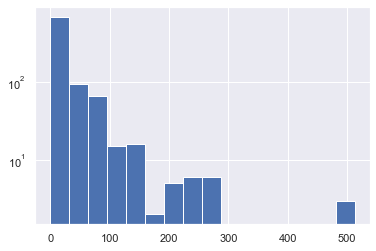

In [41]:
# Histogram of the fares.
fares = df["Fare"].values.tolist()
n = math.ceil((max(ages) - min(ages))/5)
ax = plt.hist(fares, bins = n, log=True)

### Exploring relationships between variables

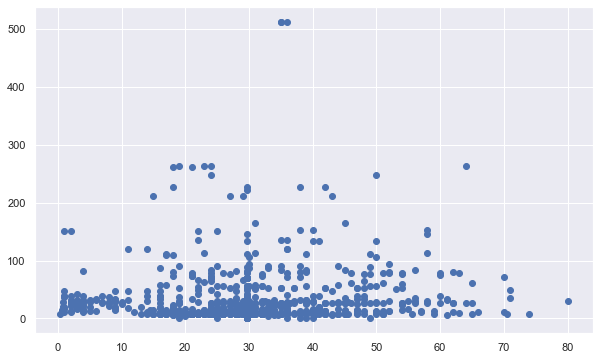

Person Correlation: 0.09156609328505758


In [12]:
# Using scatterplot to look at the relationships of continous variables
# Here Age and Fare
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Age"], df["Fare"])
plt.show()
print(f"Person Correlation: {np.corrcoef(np.array(df['Age']), np.array(df['Fare']))[0][1]}")

In [44]:
# Select all persons that did not survive.
df_dead = df[df["Survived"] == 0]
df_dead.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


male      0.852459
female    0.147541
Name: Sex, dtype: float64

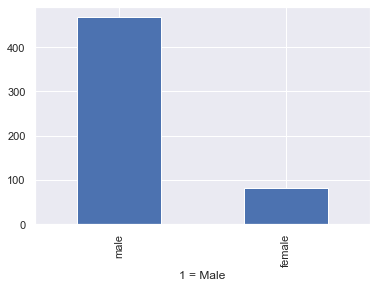

In [45]:
# Check sex of deceased.
df_dead["Sex"].value_counts().plot(kind="bar")
plt.xlabel("1 = Male")
df_dead["Sex"].value_counts(normalize="True")